In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Read the data files and see what the data looks like
mouse_data_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'
mouse_df = pd.read_csv(mouse_data_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_df = pd.read_csv(study_results_path)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Cleaning the data
* The instructions say to remove any mice with duplicate timepoints. I'm not sure why they must be removed completely...

In [4]:
original_length = study_df.shape[0]
original_mice = mouse_df.shape[0]
study_df['Duplicate'] = study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates_df = study_df[study_df['Duplicate']]
print(f'There were {duplicates_df.shape[0]} duplicate records:')
duplicates_df

There were 10 duplicate records:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
107,g989,0,45.000000,0,True
137,g989,0,45.000000,0,True
329,g989,5,48.786801,0,True
360,g989,5,47.570392,0,True
620,g989,10,51.745156,0,True
681,g989,10,49.880528,0,True
815,g989,15,51.325852,1,True
869,g989,15,53.442020,0,True
950,g989,20,55.326122,1,True
1111,g989,20,54.657650,1,True


In [5]:
# what are all the IDs with duplicated records?
# Are there more than ten records with these IDs?
# Yes, it turns out that there was one ID with duplicate records.
# The ID was used 13 times but 3 of these were non-duplicated records!
# All 13 are removed here:
duplicated_ids = study_df[study_df['Duplicate']]['Mouse ID'].unique()
for mouse_id in duplicated_ids:
    study_df = study_df[study_df['Mouse ID'] != mouse_id]
    mouse_df = mouse_df[mouse_df['Mouse ID'] != mouse_id]
    print(f'Mouse {mouse_id} has been removed.')
study_df.drop(labels='Duplicate', axis='columns', inplace=True)
final_length = study_df.shape[0]
final_mice = mouse_df.shape[0]
print(f'Original records:     {original_length}')
print(f'Records removed:        {original_length-final_length}')
print(f'Clean records:        {final_length}')
print(f'Total number of mice:  {original_mice}')
print(f'Mice removed:            {original_mice - final_mice}')
print(f'Remaining mice:        {final_mice}')

Mouse g989 has been removed.
Original records:     1893
Records removed:        13
Clean records:        1880
Total number of mice:  249
Mice removed:            1
Remaining mice:        248


## Summary Table
Here, I provide summary information on tumor size for each drug regimen. 

In [6]:
# Create a summary table with the following tumor information for each drug regimen:
# mean, median, variance, standard deviation, and SEM
combined_df = study_df.merge(mouse_df)
tumor_summary_group = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = tumor_summary_group.mean()
median = tumor_summary_group.median()
variance = tumor_summary_group.var()
stdev = tumor_summary_group.std()
sem = tumor_summary_group.sem()
tumor_size_summary = pd.DataFrame({
    'Mean Tumor Size': mean,
    'Median Tumor Size': median,
    'Variance in Tumor Size': variance,
    'Standard Deviation of Tumor Size': stdev,
    'Std Error of the Mean Tumor Size (sem)': sem
})
tumor_size_summary

,Mean Tumor Size,Median Tumor Size,Variance in Tumor Size,Standard Deviation of Tumor Size,Std Error of the Mean Tumor Size (sem)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_size_summary_2 = combined_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
tumor_size_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Number of Timepoints and Mice for Each Drug Regimen
The following plots were duplicated using both DataFrame.plot() and the appropriate pyplot method. 

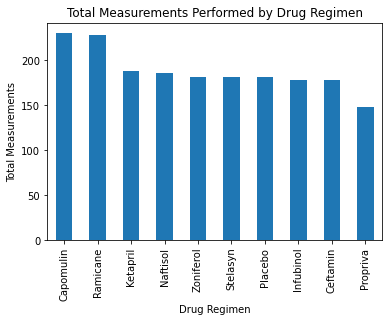

In [8]:
num_measurements_by_drug = combined_df['Drug Regimen'].value_counts()
num_measurements_by_drug.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements')
plt.title('Total Measurements Performed by Drug Regimen')
plt.show()

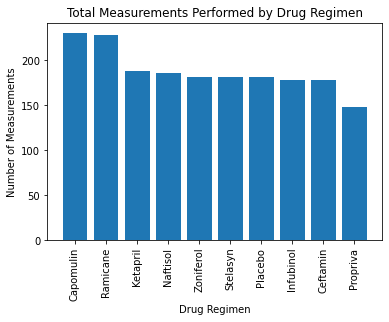

In [9]:
plt.bar(num_measurements_by_drug.index.values, num_measurements_by_drug.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)
plt.title('Total Measurements Performed by Drug Regimen')
plt.show()

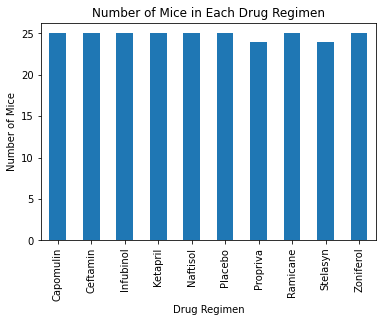

In [10]:
num_mice_by_drug = combined_df.groupby('Drug Regimen').nunique()['Mouse ID']
num_mice_by_drug.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice in Each Drug Regimen')
plt.show()

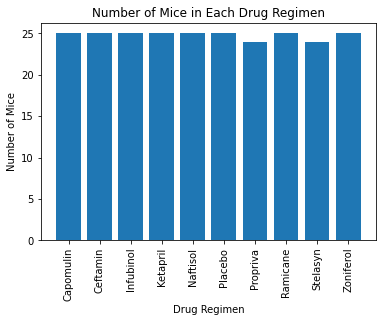

In [11]:
plt.bar(num_mice_by_drug.index.values, num_mice_by_drug.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice in Each Drug Regimen')
plt.show()

## Proportion of Male and Female Mice
I will use both DataFrame.plot() and plt.pie() to create pie charts showing the proportion of male to female mice. 

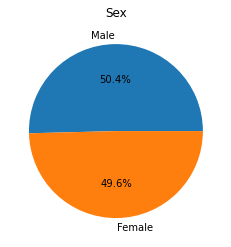

In [12]:
#mouse_sex_df = mouse_df.groupby('Sex').count()['Mouse ID']
mouse_sex_df = mouse_df['Sex'].value_counts()
autopct='%1.1f%%'
wedgeprops = {'linewidth': 10}
mouse_sex_df.plot(kind='pie', wedgeprops=wedgeprops, autopct=autopct)
plt.title("Sex")
plt.ylabel("")
plt.show()

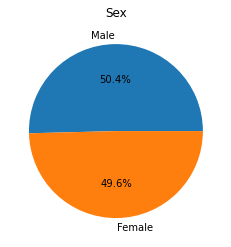

In [13]:
labels = mouse_sex_df.index.values
x = mouse_sex_df.values
autopct='%1.1f%%'
wedgeprops = {'linewidth': 10}
plt.pie(labels=labels, x=x, wedgeprops=wedgeprops, autopct=autopct)
plt.title("Sex")
plt.show()

In [14]:
# X Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

In [15]:
final_timepoints = combined_df.groupby('Mouse ID').max()['Timepoint']
# resetting the index on the final_timepoints series returns a DataFrame with columns 'Mouse ID' and 'Timepoint'
final_timepoints = final_timepoints.reset_index()
# merge with combined_df to get the information on the last timepoint for each mouse
final_volumes = combined_df.merge(final_timepoints, on=['Mouse ID', 'Timepoint'], how='right')
final_volumes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# get rid of all but the four drugs we care about - Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_bool_expr = (
    (final_volumes['Drug Regimen'] == 'Capomulin')
    | (final_volumes['Drug Regimen'] == 'Ramicane')
    | (final_volumes['Drug Regimen'] == 'Infubinol')
    | (final_volumes['Drug Regimen'] == 'Ceftamin')
)
final_volumes = final_volumes[drugs_bool_expr]
num_drug_regimes = final_volumes['Drug Regimen'].nunique()
print(f'Drug regimes represtented: {num_drug_regimes}')
print(f'Number of mice in the four regimes of interest: {final_volumes.shape[0]}')
final_volumes.head()

Drug regimes represtented: 4
Number of mice in the four regimes of interest: 100


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [17]:
treatment_dict = {
    'Capomulin': [],
    'Ramicane': [],
    'Infubinol': [],
    'Ceftamin': []
}
for treatment in treatment_dict.keys():
    volumes = final_volumes.loc[final_volumes['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    treatment_dict[treatment] = volumes
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = volumes[(volumes > upper_bound) | (volumes < lower_bound)]
    if outliers.shape[0] == 0:
        print(f'No outliers were found for {treatment}')
    else:
        print(f'Outlier volumes for {treatment}:\n{outliers.values}')

No outliers were found for Capomulin
No outliers were found for Ramicane
Outlier volumes for Infubinol:
[36.3213458]
No outliers were found for Ceftamin


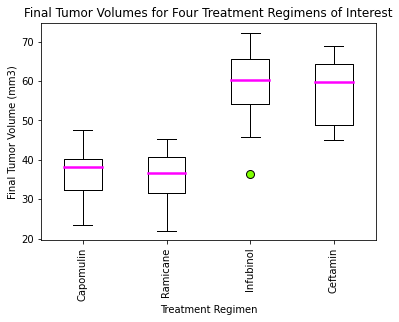

In [18]:
flierprops = dict(marker='o', markerfacecolor='chartreuse', markersize=8, linestyle='none')
medianprops = dict(linewidth=2.5, color='magenta')
plt.boxplot(treatment_dict.values(), labels=treatment_dict.keys(), flierprops=flierprops, medianprops=medianprops)
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=90)
plt.title('Final Tumor Volumes for Four Treatment Regimens of Interest')
plt.show()

## One Mouse's Story
Here is a line plot of the tumor volume for a single mouse treated with Capomulin.

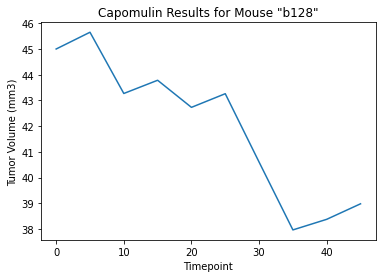

In [19]:
mouse_data = combined_df.loc[combined_df['Mouse ID'] == 'b128',['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin Results for Mouse \"b128\"')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

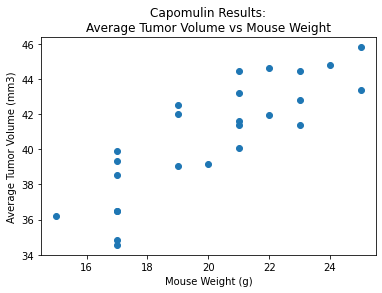

In [20]:
tumor_weight_df = combined_df[combined_df['Drug Regimen']=='Capomulin']
tumor_weight_df = tumor_weight_df.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]
plt.scatter(tumor_weight_df['Weight (g)'], tumor_weight_df['Tumor Volume (mm3)'])
plt.title('Capomulin Results:\nAverage Tumor Volume vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

Mouse weight and tumor volume have a correlation of 0.84


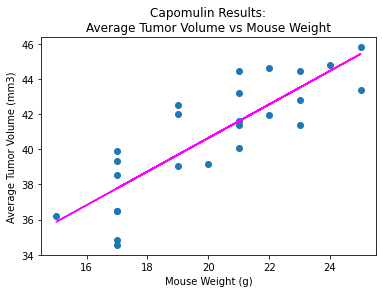

In [21]:
correlation = st.pearsonr(tumor_weight_df['Tumor Volume (mm3)'], tumor_weight_df['Weight (g)'])[0]
correlation = round(correlation, 2)
print(f'Mouse weight and tumor volume have a correlation of {correlation}')
regression = st.linregress(tumor_weight_df['Weight (g)'], tumor_weight_df['Tumor Volume (mm3)'])
y_vals = tumor_weight_df['Weight (g)'] * regression[0] + regression[1]

plt.scatter(tumor_weight_df['Weight (g)'], tumor_weight_df['Tumor Volume (mm3)'])

plt.plot(tumor_weight_df['Weight (g)'], y_vals, color='magenta')

plt.title('Capomulin Results:\nAverage Tumor Volume vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()